## Jupyter project using various Python APIs
#### *ft. Twitter, Google NLP, Wordcloud*
* **수업 목표: 다양한 API를 경험하여 원하는 기능을 프로젝트와 결합할 수 있는 실력을 갖춘다.**
  1. Tweepy를 이용해 입력된 키워드 기준으로 트위터 내용을 크롤링할 수 있다.
  2. Google Natural Language API를 이용해 문장을 입력했을 때 긍정적/부정적인지 감정분석을 할 수 있다.
  3. Wordcloud 모듈을 이용해 입력된 문자열을 쪼개고 빈도수에 비례한 크기로 시각화할 수 있다.
* ***What is API?***
  * *Application Programming Interface, 응용 프로그램 프로그래밍 인터페이스는 응용 프로그램에서 사용할 수 있도록,<br> 운영 체제나 프로그래밍 언어가 제공하는 기능을 제어할 수 있게 만든 인터페이스를 뜻한다.*
  * ex) Matrix multiplication using `numpy` API

In [42]:
A = [[1, 2, 3], [4, 5, 6]]
B = [[2, 4], [8, 10], [14, 16]]

In [43]:
if len(A[0]) != len(B):
    raise Exception()
[[sum(a*b for a, b in zip(rowA, colB)) for colB in zip(*B)] for rowA in A]

[[60, 72], [132, 162]]

In [44]:
import numpy as np
np.matmul(A, B)

array([[ 60,  72],
       [132, 162]])

* ***Why using APIs?***
  * API를 사용하면 우리가 제어 하고자 하는 시스템의 환경을 정확히 알지 못하더라도 손 쉽게 제어가 가능하다.
  * UI가 사용자와 시스템의 인터페이스 였다면 API는 시스템과 시스템간의 인터페이스라고 할 수 있다.

![](https://swisscognitive.ch/wp/wp-content/uploads/2020/11/what-is-artificial-intelligence.png)

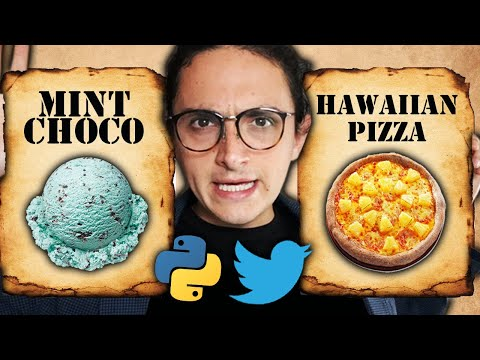

In [22]:
from IPython.display import YouTubeVideo
YouTubeVideo('QTgRNer2epE', width=800, height=450)

### Twitter API
* Get Access Token
  1. [apps.twitter.com](https://apps.twitter.com)
  2. Create an App > Fill an application
  > *Hello? I'm Sangjun, Son, a student from Seoul National University. While doing TA works, I thought it would be great opportunities for students to experience various python features. I'll teach positive/negative sentiment analysis using keywords from twitter data (tweepy).*
  3. Projects & Apps > Generate Access token & secret
    * *API key, API secret key, Access token, Access token secret*

In [24]:
!pip install tweepy

In [23]:
import tweepy

consumer_key = "VKlVlLNdrq7AGjUOvckzY9YMw"
consumer_secret = "o4daqr9r8qxv4eHlwKzvKnw0HGpz7qVX8aaPqkOfdu56w87L3i"
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)

access_token = "1333657224887951362-N1i7ZX9Kh8PwuIvVN7P4jshcYwTLla"
access_token_secret = "WX1mDwtpbt8gsN1coJsqPXWVVz06y0tHkRCHl7SVV2D2M"
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [26]:
keyword = "부먹"
cursor = tweepy.Cursor(api.search, q=keyword, since='2020-01-01', count=100, include_entities=True)
for i, tweet in enumerate(cursor.items()):
    print("{}: {}".format(i, tweet.text))

0: RT @lollapang: 200509 부이앱 백기🐯🐰

오늘 점심으로 밍이 먹고 있던 샐러드를 먹엇다는 지아비 강씨.. https://t.co/CkUjdbZWgq
1: RT @ENTP_cheese1: #MBTI #ENTP 
탕수육 부먹vs찍먹
민트초코 호vs불호
붕어빵 팥vs슈크림
과 같은 주제들에
가장 진심인 엔팁
2: 크리스마스 케이크 한서원한테 부먹하기 vS 케이크에 찍먹하기 

지금 이런 고민 중임 ..
3: RT @ENTP_cheese1: #MBTI #ENTP 
탕수육 부먹vs찍먹
민트초코 호vs불호
붕어빵 팥vs슈크림
과 같은 주제들에
가장 진심인 엔팁
4: RT @ENTP_cheese1: #MBTI #ENTP 
탕수육 부먹vs찍먹
민트초코 호vs불호
붕어빵 팥vs슈크림
과 같은 주제들에
가장 진심인 엔팁
5: #MBTI #ENTP 
탕수육 부먹vs찍먹
민트초코 호vs불호
붕어빵 팥vs슈크림
과 같은 주제들에
가장 진심인 엔팁
6: 모두의 익명 질문을 모집 중!

최근 답변한 질문
● 탕수육 부먹 vs 찍먹?…
● 용가님의 최애캐는...?…
● 연령대가 어떻게 되시나요?…
● 닉네임은 무슨 뜻인가요?…
#질문상자 #익명질문모집중

https://t.co/NAWSUrIeDr
7: RT @Ice_Cracker0v0: 부먹찍먹처먹 https://t.co/lVdFkiuARp
8: 아 이거 전에 치치님 썰 탕수육 부먹 인버전 생각남 ㅋㅋㅋㅋㅋㅋㅋㅋㅋ
9: RT @GH_yeegatantan: #트친소
#그림러_트친소
양심상... 좀비고트친소해시는 안달앗음
좀비고본진으로먹고 부본진으로 네루가랑 또봇먹는사람입니다... 예
좀고러분들...은 정말 유의해야 할 점...
저 현우빈 진케 타컾먹습니다...
영업당…
10: 모두의 익명 질문을 모집 중!

최근 답변한 질문
● 항문에 이빨이 나면
항문외…
● 카레맛똥vs똥맛카레!!!!…
● 부먹 vs 찍먹…
● 꼭 둘중 하나
패치 엉덩이…
#질문상자 #익명질문모집중

https://t.co/kj5YvdvBbH
11:

KeyboardInterrupt: 

### Google Natural Language API
* [Documentation](https://cloud.google.com/natural-language/docs/quickstarts)
* [console.cloud.google.com](https://console.cloud.google.com)
  * API Library > Cloud Natural Language API > 사용
  * 사용자 인증 정보 만들기 > [API 키](https://console.cloud.google.com/apis/credentials/serviceaccountkey?_ga=2.149612351.88419587.1606806283-1529152370.1593052341) (json)
* Google Cloud Installation
  * `pip install --upgrade google-cloud-language`

In [ ]:
!pip install --upgrade google-cloud-language

In [27]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="./dccp.json"

In [35]:
# Imports the Google Cloud client library
from google.cloud import language_v1

# Instantiates a client
client = language_v1.LanguageServiceClient()

# The text to analyze
# text = "holy moly. :)"
text = 'im crying tears of joy'
document = language_v1.Document(content=text, type_=language_v1.Document.Type.PLAIN_TEXT)

# Detects the sentiment of the text
sentiment = client.analyze_sentiment(request={'document': document}).document_sentiment

print("Text: {}".format(text))
print(sentiment)

Text: im crying tears of joy
magnitude: 0.8999999761581421
score: 0.8999999761581421



### Word Cloud
* `pip install wordcloud`
* Add font style *font.ttf* in the same directory

In [ ]:
!pip install wordcloud

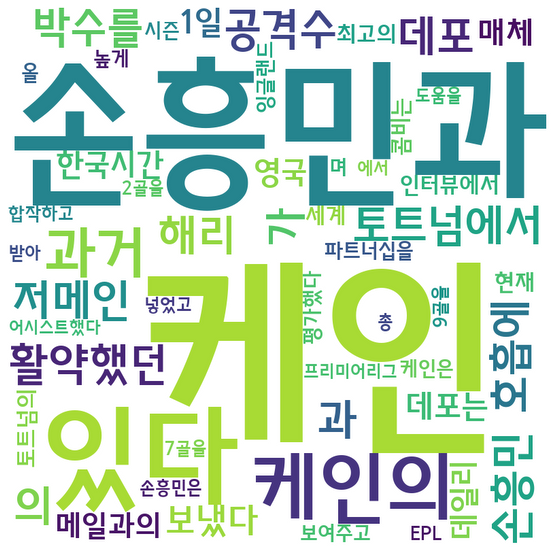

In [36]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = '과거 토트넘에서 활약했던 공격수 저메인 데포(38)가 손흥민(28)과 해리 케인(27)의 호흡에 박수를 보냈다. 데포는 1일(한국시간) 영국 매체 데일리 메일과의 인터뷰에서 "토트넘의 손흥민과 케인 콤비는 현재 세계 최고의 파트너십을 보여주고 있다"며 높게 평가했다. 올 시즌 손흥민과 케인은 잉글랜드 프리미어리그(EPL)에서 총 9골을 합작하고 있다. 손흥민은 케인의 도움을 받아 7골을 넣었고, 케인의 2골을 어시스트했다.'
wordcloud = WordCloud(font_path='./font.ttf', background_color='white', width = 800, height = 800).generate(text)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='lanczos')
plt.axis('off')
plt.show()


### *Putting them together*

In [37]:
import tweepy
import os, sys
import matplotlib.pyplot as plt
from google.cloud import language_v1
from wordcloud import WordCloud, STOPWORDS

def initialize_tweepy(keyword):
    consumer_key = "VKlVlLNdrq7AGjUOvckzY9YMw"
    consumer_secret = "o4daqr9r8qxv4eHlwKzvKnw0HGpz7qVX8aaPqkOfdu56w87L3i"
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)

    access_token = "1333657224887951362-N1i7ZX9Kh8PwuIvVN7P4jshcYwTLla"
    access_token_secret = "WX1mDwtpbt8gsN1coJsqPXWVVz06y0tHkRCHl7SVV2D2M"
    auth.set_access_token(access_token, access_token_secret)

    api = tweepy.API(auth)
    
    return tweepy.Cursor(api.search, q=keyword, since='2020-01-01', count=100, include_entities=True, lang='ko')
    
def initialize_google():
    os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="./dccp.json"
    return language_v1.LanguageServiceClient()

def get_sentiment(client, text):
    document = language_v1.Document(content=text, type_=language_v1.Document.Type.PLAIN_TEXT)
    sentiment = client.analyze_sentiment(request={'document': document}).document_sentiment
    return sentiment

def show_wordcloud(good_text, bad_text):
    stop_words = ["https", "co", "RT", 't'] + list(STOPWORDS)
    wordcloud = WordCloud(font_path='./font.ttf', stopwords=stop_words, background_color='white', width = 800, height = 800).generate(good_text)
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='lanczos')
    plt.axis('off')
    plt.show()
    
    wordcloud = WordCloud(font_path='./font.ttf', stopwords=stop_words, background_color='black', width = 800, height = 800).generate(bad_text)
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='lanczos')
    plt.axis('off')
    plt.show()

In [45]:
good_text = ''
bad_text = ''

cursor = initialize_tweepy(input())
client = initialize_google()

for i, tweet in enumerate(cursor.items()):
    if i > 100: break
    text = tweet.text
    sentiment = get_sentiment(client, text)
    print(f"{i}: {text} {sentiment.score}")

    if sentiment.score > 0.2:
        good_text += text
    elif sentiment.score < -0.2:
        bad_text += text    

 코쿤


0: @i4ppppgr 코쿤~ 0.6000000238418579
1: 자꾸 마음대로 IQ 10씩 올리는 코쿤 https://t.co/vx90wiTjqo -0.30000001192092896
2: 코쿤도 코크다고하내요 https://t.co/Tn1sJo5Ter 0.6000000238418579
3: 토드비 뉴 코쿤 ISOFIX 부스터 카시트 분리형, 오렌지 362 개의 후기가 인정한 제품! 50% 저렴한 64,530원에 무배 지금 사면 내일 온다. https://t.co/tDxgRG8MvU https://t.co/m6FVrtCdvo 0.30000001192092896
4: 토드비 뉴 코쿤 ISOFIX 부스터 카시트 분리형, 오렌지  원래 130,000원 에서 50% 저렴한 무배 64,530원 지금 사면 내일 도착!https://t.co/tDxgRG8MvU https://t.co/2V3FnBIjCc 0.20000000298023224
5: 토드비 뉴 코쿤 ISOFIX 부스터 카시트 분리형, 오렌지 후기만 362 개로 증명한 제품! 50% 저렴한 64,530원에 무배 지금 사면 내일 온다. https://t.co/tDxgRG8MvU https://t.co/mPQWl4pQZa 0.20000000298023224
6: 토드비 뉴 코쿤 ISOFIX 부스터 카시트 분리형, 오렌지 이미 품절대란 50% 저렴한 64,530원에 무배 로켓배송으로 내일 도착!https://t.co/tDxgRG8MvU https://t.co/TpxAqGJV9H 0.20000000298023224
7: @cokunisprincess 아하 코쿤 ㅇㅋ 0.30000001192092896
8: "래퍼 코큰닥스훈트가 누군가요"…코드 쿤스트(코쿤), 인스타서 질문글 찾아 성지순례 #코드쿤스트 #코쿤 #인스타 #본명 #이름 #나이 #지식인 https://t.co/vTCwlq9ULS 0.0
9: 토드비 뉴 코쿤 ISOFIX 부스터 카시트 분리형, 오렌지 오늘만 이 가격 특가로 50% 할인해서  무배 64,530

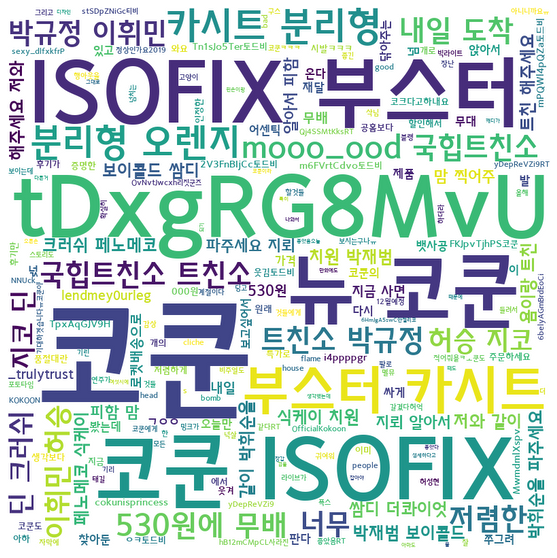

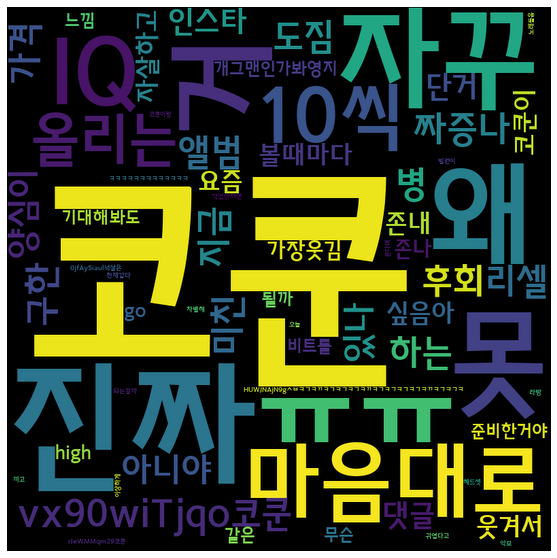

In [46]:
show_wordcloud(good_text, bad_text)

### *Reference*
* [Why using APIs?](https://velog.io/@won-developer/API-%EB%9E%80)
* [Twitter Sentiment Analysis with Machine Learning](https://monkeylearn.com/blog/sentiment-analysis-of-twitter/)
* [Tweepy Usage](https://kslee7746.tistory.com/entry/python-tweepy-%EC%82%AC%EC%9A%A9%ED%95%9C-%ED%8A%B8%EC%9C%84%ED%84%B0-%ED%81%AC%EB%A1%A4%EB%A7%81crawling)